## K-Means Clustering

Use a sample dataset to build a K-Means clustering model from scratch, then use it for image compression.

In [116]:
import numpy as np
from scipy.io import loadmat
from scipy.ndimage import imread
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [117]:
def init_centroids(num_centroids, X, rand_state=None):
    """User inputs a desired number of centroids. Random initializes each 
    centroid to one of the points in the dataset.
    """
    np.random.seed(rand_state)
    shuffled_X = np.random.permutation(X)
    return shuffled_X[:num_centroids]


def euclidean_distance(centroids, X):
    """Pass in 2D arrays of centroids (k x n) and data (m x n). Return 
    (m x k) array where each row contains the Euclidean distances from each 
    centroid for a single example x.
    """
    # Reshape X so that row-wise subtraction is possible.
    diffs = centroids - X[:, np.newaxis, :]         # m x k x n
    sum_squares = (diffs ** 2).sum(axis=2)          # m x k
    return np.sqrt(sum_squares)


def assign_to_centroids(centroids, X):
    """For each example in X, calculate the distance to each centroid and 
    store the closest one. Returns a list of centroid assignments.
    
    To assign a single example to a cluster, pass in x as a 2D array: 
    np.array([[x1, x2]]).
    """
    distances = euclidean_distance(centroids, X)
    return np.argmin(distances, axis=1)


def move_centroids(X, assignments):
    """Calculate new centroid locations from examples currently assigned to 
    that cluster.
    """
    new_centroids = []
    k = len(np.unique(assignments))
    for i in range(k):
        cluster = X[assignments == i]
        new_centroids.append(cluster.mean(axis=0))
    return np.array(new_centroids)
    
    
def plot_clusters(centroids, X, assignments, colors=None, graph_title=None, 
                  is_image=False):
    """Pass in centroid locations, X, and assignment indices. Plot scatter 
    chart where each point in X is colored
    corresponding to its assigned cluster.
    """
    backup_colors = ['red', 'green', 'blue', 'grey', 'black', 'purple', 
                     'brown', 'yellow', 'orange']
    if is_image:
        colors = [to_hex(row) for row in centroids]
    elif colors is None:
        colors = backup_colors
    assigned_colors = [colors[j] for j in assignments]
    
    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter(X[:,0], X[:,1], s=5, alpha=0.75, c=assigned_colors)
    ax.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c=colors)
    plt.title(graph_title, fontsize=20)
    plt.show()
    
    
def compute_total_cost(centroids, X, assignments):
    """Compute total cost for all values of X."""
    assigned_coords = np.array([centroids[j] for j in assignments])
    square_dists = (X - assigned_coords) ** 2
    sum_squares = np.sum(square_dists, axis=1)
    return np.mean(sum_squares)


def run_kmeans(num_centroids, data, num_runs, max_iters, min_improvement, 
               colors=None, initial_centroids=None, is_image=False):
    """Initialize K-Means and iterate until cost function stops decreasing 
    significantly.
    """
    final_centroids = []
    final_costs = []
    final_assignments = []
    for i in range(num_runs):
        run_costs = []
        if initial_centroids is not None:
            centroids = initial_centroids
        else:
            centroids = init_centroids(num_centroids, data, rand_state=None)
            
        # Iterate through one run of K-Means.
        for j in range(max_iters):
            assignments = assign_to_centroids(centroids, data)
            cost = compute_total_cost(centroids, data, assignments)
            run_costs.append(cost)
            
            # Plot initial clusters, then move centroids.
            if j == 0:
                plot_clusters(centroids, data, assignments, colors, 
                              'Initial Clusters', is_image)
            centroids = move_centroids(data, assignments)

            # Stop iterating when cost stops decreasing by desired amount.
            if (len(run_costs) > 1) and run_costs[-2]- cost < min_improvement:    
                print('Cost minimized after {} iterations.'.format(j))
                break
        
        # Plot final clusters.
        plot_clusters(centroids, data, assignments, colors, 'Final Clusters', is_image)
        final_centroids.append(centroids)   
        final_costs.append(cost)
        final_assignments.append(assignments)
    return (final_centroids, final_costs, final_assignments)


def best_model(centroids, costs, assignments):
    """Pass in output from run_kmeans function. Return the centroids with the 
    lowest cost.
    """
    index = np.argmin(costs)
    return (centroids[index], costs[index], assignments[index])

## Load data

In [119]:
data = loadmat('data/ex7data2.mat')['X']
print(data.shape)
print(data[:5,:])

(300, 2)
[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


## Visualize data

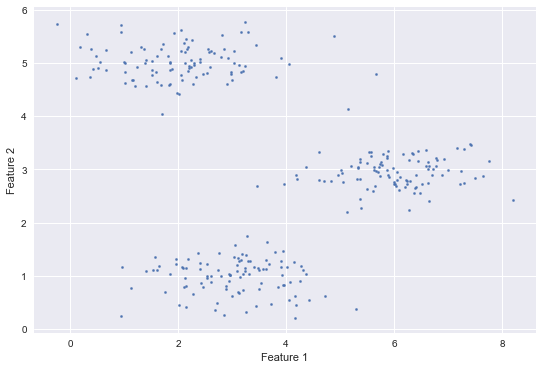

In [120]:
colors = ['red', 'green', 'blue']
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(data[:,0], data[:,1], s=5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Iterate

Initialize centroids, assign each example to a cluster, and calculate new centroid locations. Repeat until additional iterations fail to decrease the cost function by a significant amount.

In [121]:
num_centroids = 3
num_trials = 5
max_iters = 50
min_improvement = .0001
colors = ['red', 'green', 'blue']

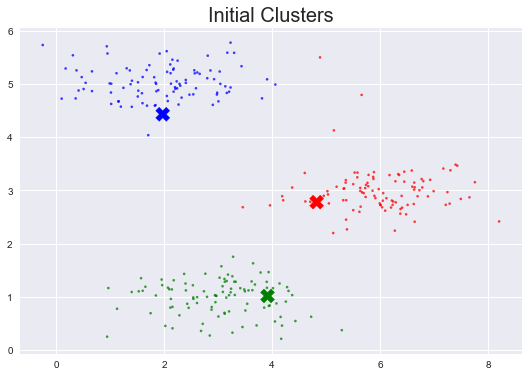

Cost minimized after 3 iterations.


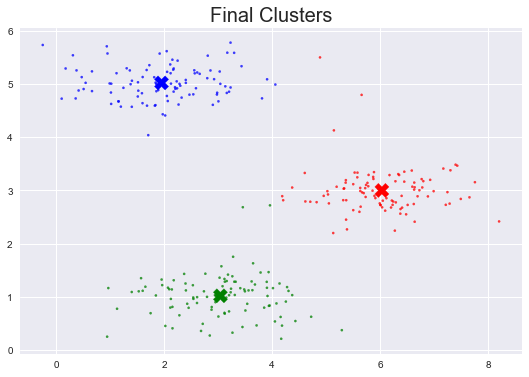

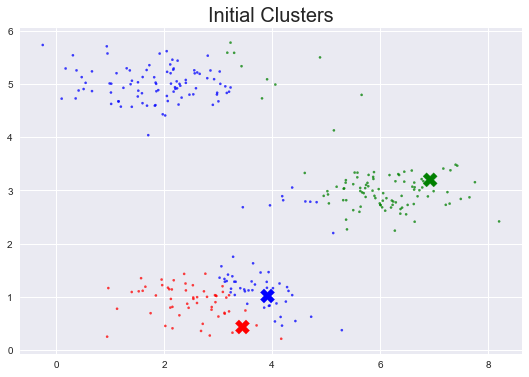

Cost minimized after 4 iterations.


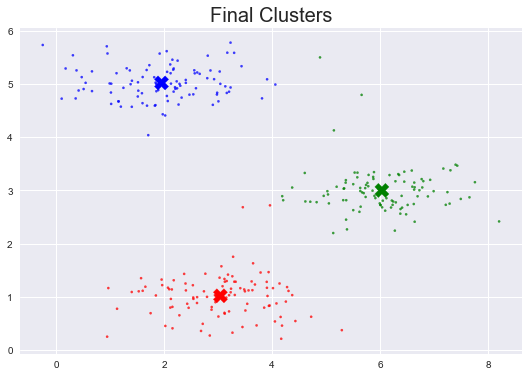

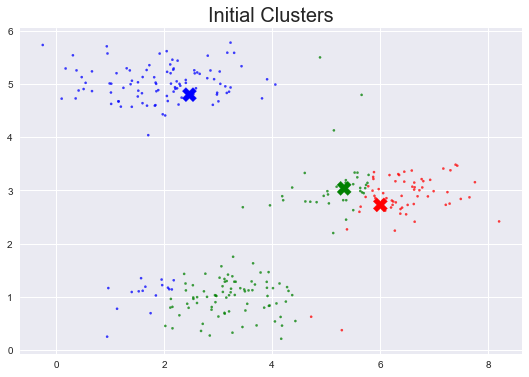

Cost minimized after 4 iterations.


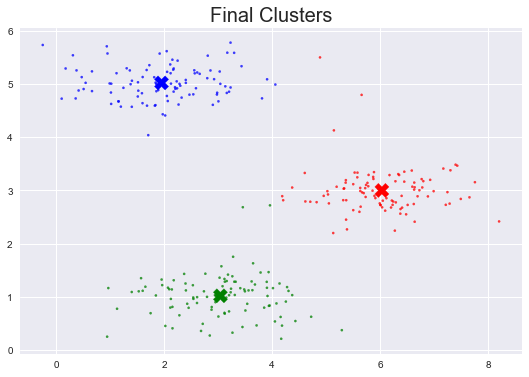

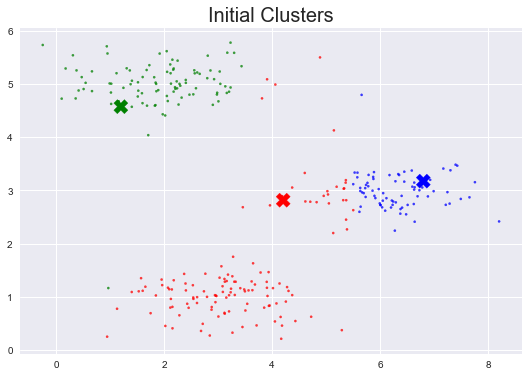

Cost minimized after 4 iterations.


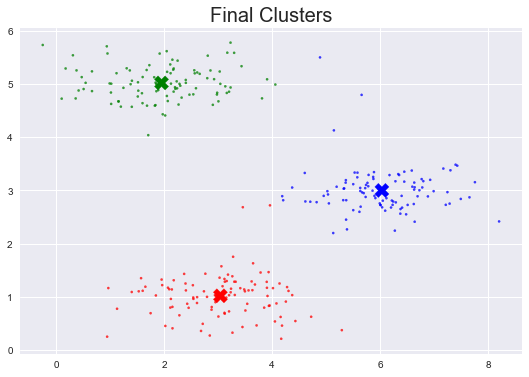

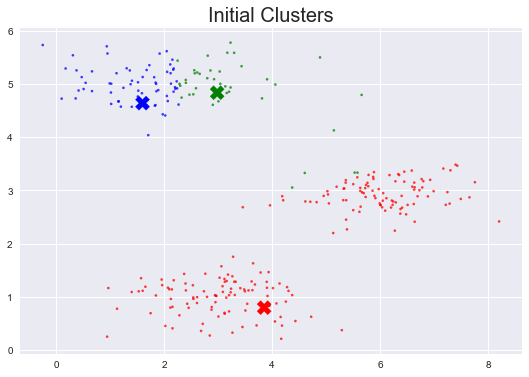

Cost minimized after 3 iterations.


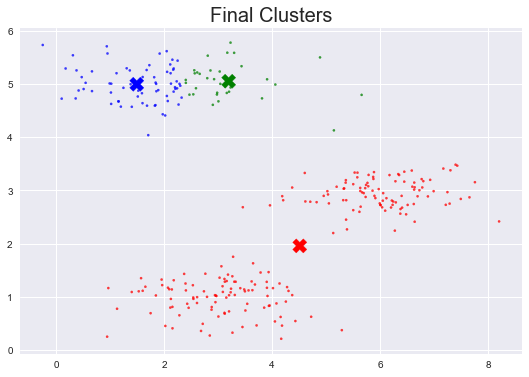

Final centroids:
[[6.03366736 3.00052511]
 [3.04367119 1.01541041]
 [1.95399466 5.02557006]]

Final cost:
0.8888617321830645


In [122]:
output = run_kmeans(num_centroids, data, num_trials, max_iters, min_improvement, colors)
best_centroids, best_cost, best_assignments = best_model(*output)
print('Final centroids:\n{}'.format(best_centroids))
print('\nFinal cost:\n{}'.format(best_cost))

In [123]:
# Example: Assign a new data point to a cluster.
new_x = np.array([[5, 2]])
new_assignment = assign_to_centroids(best_centroids, new_x)[0]
print('New data point: {}'.format(new_x))
print('\nCluster ' + str(new_assignment))
print(best_centroids[new_assignment])

New data point: [[5 2]]

Cluster 0
[6.03366736 3.00052511]


# II. Image compression with KMeans

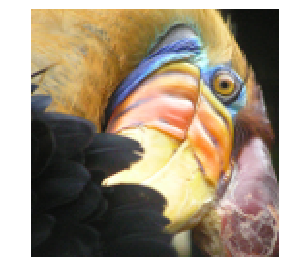

In [124]:
# Load 128px x 128px image file into 3-dimensional numpy array.
img_file = r'images/bird_small.png'
img = imread(img_file)
plt.imshow(img)
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.show()

In [125]:
# Reshape so each row contains rgb values for a single pixel, then scale 
# values to fit between 0 and 1.
img = (img/255).reshape(-1,3)

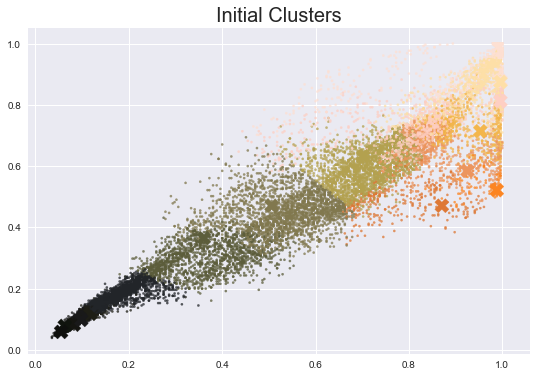

Cost minimized after 7 iterations.


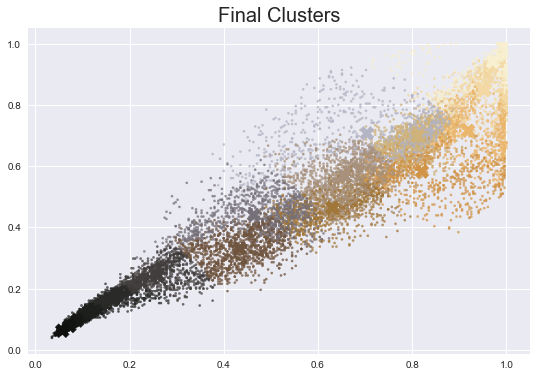

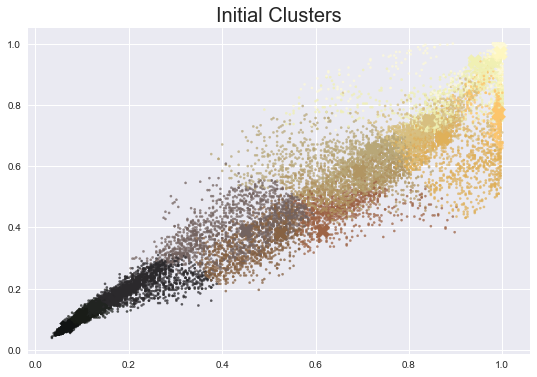

Cost minimized after 9 iterations.


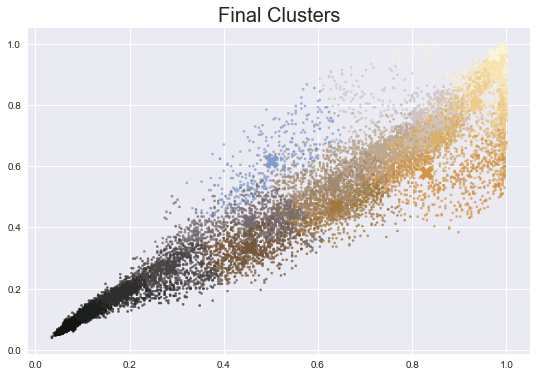

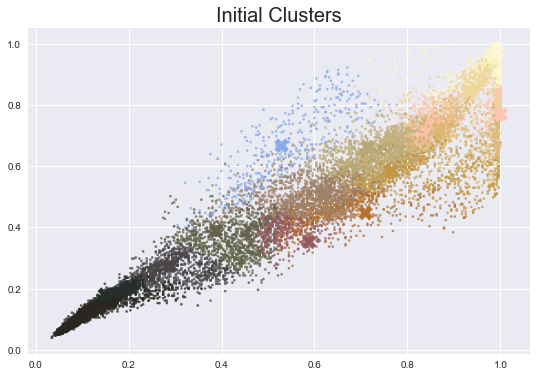

Cost minimized after 7 iterations.


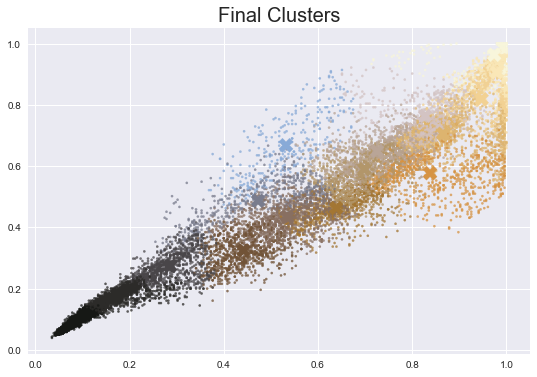

Final centroids:
[[0.83789254 0.57710605 0.26420753]
 [0.08556427 0.09263016 0.08246137]
 [0.17196565 0.17030581 0.1611848 ]
 [0.53213622 0.66778122 0.84151359]
 [0.97920982 0.90572892 0.71854509]
 [0.86559453 0.70529712 0.43657732]
 [0.44192272 0.32480595 0.21612676]
 [0.47288938 0.48714021 0.5518017 ]
 [0.6386922  0.46319511 0.19945355]
 [0.53480065 0.43359972 0.37865409]
 [0.28621057 0.27393436 0.28504689]
 [0.82743651 0.76396064 0.76503871]
 [0.94740236 0.81839226 0.57510702]
 [0.69853235 0.589519   0.41677038]
 [0.72554994 0.64878062 0.5926457 ]
 [0.97399412 0.96333273 0.85904539]]

Final cost:
0.007622746645012477


In [126]:
# Set parameters for K-Means. Create list of rgb tuples to pass to 
# matplotlib as colors.
img_num_runs = 3
img_max_iters = 100
img_num_centroids = 16
img_output = run_kmeans(num_centroids=img_num_centroids, data=img, 
                        num_runs=img_num_runs, max_iters=img_max_iters, 
                        min_improvement=min_improvement, is_image=True)
img_best_centroids, img_best_cost, img_best_assignments = best_model(*img_output)
print('Final centroids:\n{}'.format(img_best_centroids))
print('\nFinal cost:\n{}'.format(img_best_cost))

## Compress Image

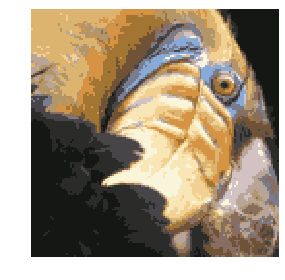

In [127]:
compressed_bird = 'images/compressed_bird.png'
compressed_locations = np.array([list(img_best_centroids[i]) 
                                 for i in img_best_assignments])\
                                 .reshape(128, 128, 3)
plt.imshow(compressed_locations)
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.savefig(compressed_bird)
plt.show()

# III. scikit-Learn Implementation

(500, 715, 3)


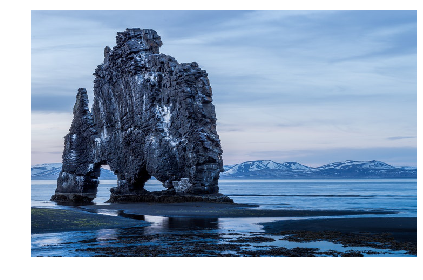

In [128]:
import pandas as pd
from sklearn.cluster import KMeans

img_name = 'images/rock_formation.png'
img_rock = imread(img_name)
print(img_rock.shape)

plt.imshow(img_rock, aspect='auto')
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.show()
img_rock = (img_rock/255).reshape(-1,3)

In [129]:
clf = KMeans(n_clusters=8)
clf.fit(img_rock)
rock_centroids = clf.cluster_centers_
rock_assignments = clf.predict(img_rock)

# Create new array of rgb values of closest centroid for each pixel.
rock_locations = np.array([rock_centroids[i] for i in rock_assignments])\
                   .reshape(500, 715, 3)

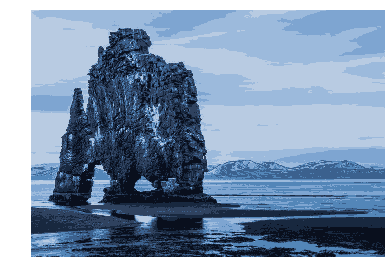

In [130]:
compressed_file = 'images/compressed_rock.png'
plt.imshow(rock_locations)
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.savefig(compressed_file)
plt.show()